In [1]:
### Training with manually updating W with "Backward" ###

import torch
#from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
data = [(1.0,2.1,3.0), (2.0, 3.5, 6.0), (3.0, 3.0, 9.0), (4.0, 2.1, 12.0), (5.0, 7.2, 15.0), (6.0, 10.1, 18.0)]

target = torch.tensor([[d[2]] for d in data], dtype=torch.float)
data = torch.tensor([[d[0],d[1]] for d in data], dtype=torch.float)


In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1,bias=False)
    def forward(self, x):
        x = self.fc1(x)
        return x

In [4]:
net = Net()

print(net)
print(list(net.parameters()))

Net(
  (fc1): Linear(in_features=2, out_features=1, bias=False)
)
[Parameter containing:
tensor([[ 0.0632, -0.5951]], requires_grad=True)]


In [5]:
#input = torch.randn(1)
#out = net(input)

#def criterion(out, label):
#    return (label - out)**2
criterion = nn.MSELoss()


optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
#optimizer = optim.Adam(net.parameters(), lr=0.005)

...

Ellipsis

In [6]:
# Train with mini batch
hist = []
batch_size = 3
for epoch in range(300):
    for i in range(2):
        # first iteration is 0,1,2
        # second iteration is 3,4,5
        batch_data = data[batch_size*i:batch_size*(i+1)]
        batch_target = target[batch_size*i:batch_size*(i+1)]
        optimizer.zero_grad()
        outputs = net(batch_data)
        loss = criterion(outputs, batch_target)
        loss.backward()
        hist.append(loss.detach())
        optimizer.step()
    if epoch%10==0: print("Epoch {} - loss: {}".format(epoch, loss))
print("Epoch {} - loss: {}".format(epoch, loss))

Epoch 0 - loss: 198.5062713623047
Epoch 10 - loss: 2.0824508666992188
Epoch 20 - loss: 0.2612893283367157
Epoch 30 - loss: 0.04868486151099205
Epoch 40 - loss: 0.00906317587941885
Epoch 50 - loss: 0.0016870512627065182
Epoch 60 - loss: 0.00031402864260599017
Epoch 70 - loss: 5.846041312906891e-05
Epoch 80 - loss: 1.088203953258926e-05
Epoch 90 - loss: 2.0264817521820078e-06
Epoch 100 - loss: 3.7711410527663247e-07
Epoch 110 - loss: 7.051039574434981e-08
Epoch 120 - loss: 1.3071257853880525e-08
Epoch 130 - loss: 2.489893402568555e-09
Epoch 140 - loss: 4.3686063100345507e-10
Epoch 150 - loss: 8.852415328552965e-11
Epoch 160 - loss: 1.5158244451307645e-11
Epoch 170 - loss: 4.2443084637133754e-12
Epoch 180 - loss: 3.031648933629616e-12
Epoch 190 - loss: 3.031649096259942e-13
Epoch 200 - loss: 6.063298192519884e-13
Epoch 210 - loss: 6.063298192519884e-13
Epoch 220 - loss: 6.063298192519884e-13
Epoch 230 - loss: 3.031649096259942e-13
Epoch 240 - loss: 6.063298192519884e-13
Epoch 250 - loss: 

when x = tensor([1.0000, 2.1000]), y = tensor([3.0000], grad_fn=<SqueezeBackward4>), actual=3.0
when x = tensor([2.0000, 3.5000]), y = tensor([6.0000], grad_fn=<SqueezeBackward4>), actual=6.0
when x = tensor([3., 3.]), y = tensor([9.0000], grad_fn=<SqueezeBackward4>), actual=9.0
when x = tensor([4.0000, 2.1000]), y = tensor([12.0000], grad_fn=<SqueezeBackward4>), actual=12.0
when x = tensor([5.0000, 7.2000]), y = tensor([15.0000], grad_fn=<SqueezeBackward4>), actual=15.0
when x = tensor([ 6.0000, 10.1000]), y = tensor([18.], grad_fn=<SqueezeBackward4>), actual=18.0


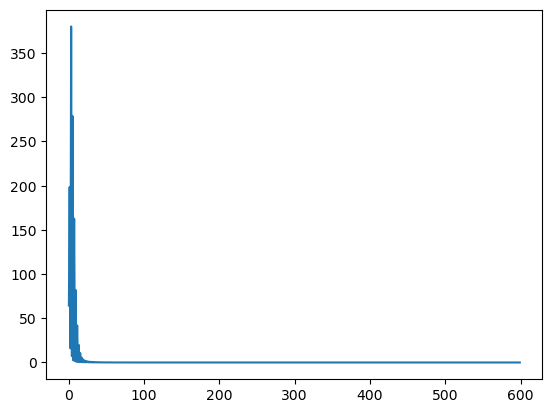

In [7]:
### Test the trained network ###
for i, current_data in enumerate(data):
    out = net(current_data)  
    print("when x = {}, y = {}, actual={}".format(current_data, out, target[i][0]))
    
plt.plot(hist, label = "training curve")